In [1]:
!pip install yfinance

In [2]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

I will be comparing the five "FAANG" companies to analyze their average stock prices and returns over the past 5 years, with the goal of conducting a comprehensive risk assessment of these stocks.

In [3]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX']

end = datetime.now()

#Start date set to 3 years back
start = datetime(end.year-3,end.month,end.day)

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
NFLX.head()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2021-10-18,632.099976,638.409973,620.590027,637.969971,637.969971,4669100,NaN,NaN,NaN,NaN
2021-10-19,636.969971,641.000000,632.299988,639.000000,639.000000,7633100,NaN,NaN,NaN,0.001615
2021-10-20,625.570007,637.400024,617.150024,625.140015,625.140015,10622000,NaN,NaN,NaN,-0.021690
2021-10-21,628.890015,654.010010,628.650024,653.159973,653.159973,8437100,NaN,NaN,NaN,0.044822
2021-10-22,651.809998,665.460022,651.809998,664.780029,664.780029,6186000,NaN,NaN,NaN,0.017791


### Change in Stock Price Over Time

<Axes: xlabel='Date'>

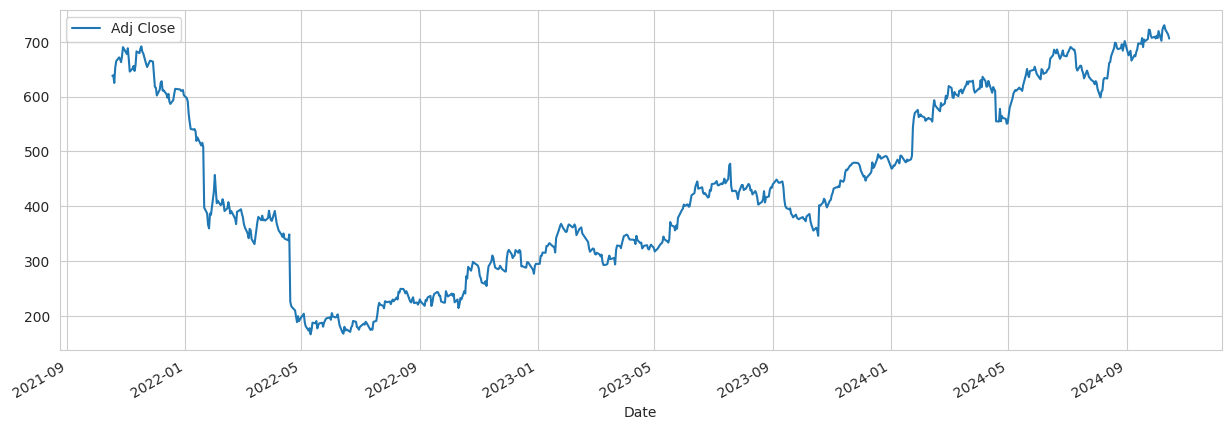

In [4]:
NFLX['Adj Close'].plot(legend = True, figsize = (15,5))

<Axes: xlabel='Date'>

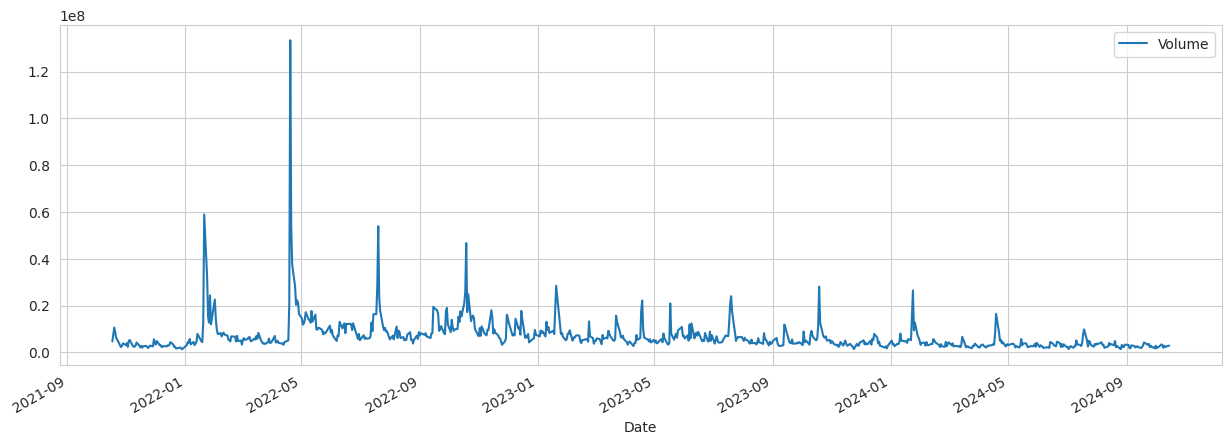

In [5]:
NFLX['Volume'].plot(legend = True, figsize = (15,5))

#### Analysis of the adjusted closing price and volume charts for Netflix stock over the past few years reveals several key trends:

* **Major Drop (April-May 2022)**: A sharp price decline from around $350 to $180, accompanied by a massive spike in trading volume, occurred due to Netflix's first subscriber loss in over a decade.
* **Recovery Period (May 2022 - Early 2023)**: The stock gradually recovered from $180 to $350, with moderate volume spikes, as Netflix announced an ad-supported tier and measures against password sharing, boosting investor confidence.
* S**teady Growth (2023)**: A continued price rise from $350 to $500 was seen, with generally lower volume, as the successful launch of new strategies led to positive subscriber growth.
* **Sharp Rise (Late 2023 - Early 2024)**: The stock surged from $500 to over $600, driven by likely strong earnings reports and exceeding market expectations.
* **Recent Fluctuations (2024)**: Prices oscillated between $600 and $700, with lower volume indicating more stability and responding to regular business updates.

### Calculating Moving Averages

In [6]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()

In [7]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Date,,,,,,,,,
2024-10-09,719.250000,728.590027,718.869995,727.429993,727.429993,1981100,712.288000,701.402397,680.852596
2024-10-10,723.289978,733.849976,722.500000,730.289978,730.289978,2767900,714.173999,703.269197,682.891396
2024-10-11,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,715.717999,705.549995,684.850197
2024-10-14,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,716.090997,707.053196,686.837396
2024-10-15,712.854980,713.400024,699.780579,705.979980,705.979980,2857327,716.075995,708.347595,688.985996


<Axes: xlabel='Date'>

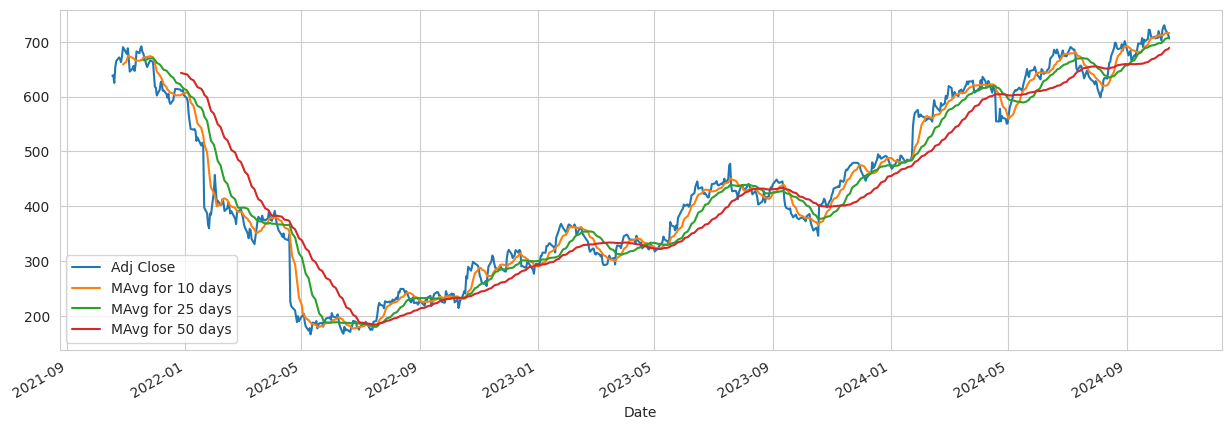

In [8]:
NFLX[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (15,5))

From this graph we analyze the stock price performance of Netflix over a 3-year period from 2021 to 2024, along with 10-day, 25-day, and 50-day moving averages.

**Analysis:**


1.   *Late 2021 to Early 2022:* The stock was trading at all-time highs around $700. This coincided with Netflix's continued growth during the pandemic as people spent more time at home streaming content.

2.  *Sharp decline in early-mid 2022:*There's a dramatic drop in the stock price, falling from around \$600 to below \$200. This aligns with Netflix's Q1 2022 earnings report in April, where they announced their first subscriber loss in over a decade. The company lost 200,000 subscribers globally, which shocked investors and led to a massive sell-off.

3. *Mid-2022 to Early 2023:* The stock price stabilized and began a gradual recovery. During this period, Netflix introduced a lower-priced ad-supported tier in November 2022 to attract more cost-conscious subscribers. They also announced plans to crack down on password sharing.

4. *Throughout 2023:* The stock showed a strong upward trend. This recovery can be attributed to several factors:
  * Successful implementation of the ad-supported tier
  * Positive subscriber growth numbers
  * The password-sharing crackdown, which began rolling out more widely

5. *In 2024*: The upward trend continues, with the stock price approaching pre-crash levels. This suggests that Netflix's strategies to combat subscriber losses and generate new revenue streams have been well-received by the market.

The moving averages provide insight into the stock's momentum:

* The 10-day moving average (orange line) is the most responsive to price changes.
* The 25-day (green) and 50-day (red) moving averages smooth out short-term fluctuations and show longer-term trends.
* When shorter-term averages cross above longer-term averages, it often indicates a bullish trend, which we can see happening in late 2022 and continuing through 2023-2024.

In summary, this graph reflects Netflix's challenges and subsequent recovery strategies over the past three years. The company faced a significant setback in early 2022 but has since implemented successful measures to regain investor confidence and drive growth.

### Daily Return Averages

In [9]:
#The daily return column can be created by using the percentage change over the adjusted closing price
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2024-10-09,719.250000,728.590027,718.869995,727.429993,727.429993,1981100,712.288000,701.402397,680.852596,0.007856
2024-10-10,723.289978,733.849976,722.500000,730.289978,730.289978,2767900,714.173999,703.269197,682.891396,0.003932
2024-10-11,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,715.717999,705.549995,684.850197,-0.010270
2024-10-14,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,716.090997,707.053196,686.837396,-0.013545
2024-10-15,712.854980,713.400024,699.780579,705.979980,705.979980,2857327,716.075995,708.347595,688.985996,-0.009846


Text(0.5, 1.0, 'Time Series of Daily Returns for NFLX')

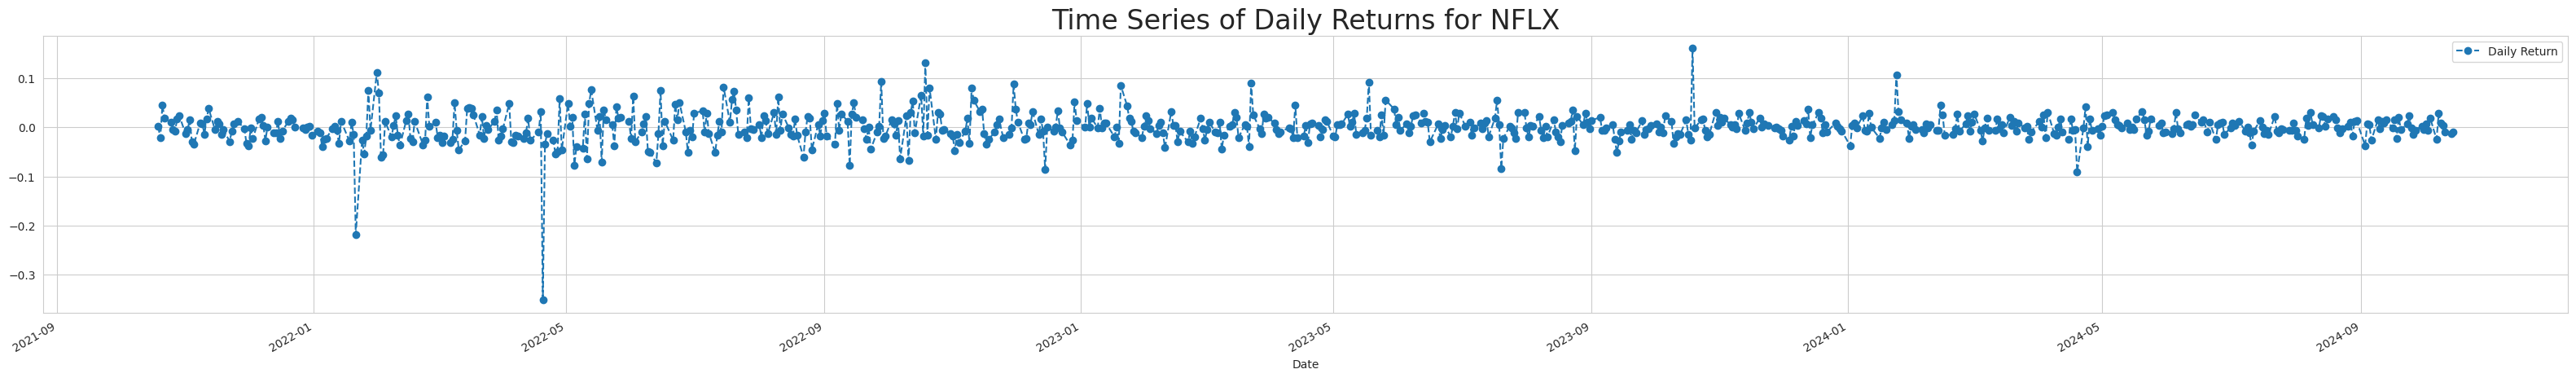

In [26]:
NFLX['Daily Return'].plot(figsize=(40,5),legend=True,linestyle='--',marker='o')
plt.title('Time Series of Daily Returns for NFLX', fontsize=24)

### Time Series of Daily Returns for NFLX

This chart illustrates the daily returns of Netflix stock over the 3-year period

* Volatility clustering: Periods of relative calm with smaller fluctuations alternate with periods of heightened volatility, marked by larger spikes.
* Extreme events: Several prominent spikes, both positive and negative, are visible. The largest negative spike likely corresponds to the April 2022 subscriber loss announcement.
* Overall trend: The magnitude of daily returns appears to slightly decrease over time, suggesting relative stability in more recent months.
* Mean reversion: Returns oscillate around zero, aligning with the centered distribution observed earlier.

<ipython-input-27-015d9609b4a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='red')


Text(0.5, 1.0, 'Distribution of Daily Returns for NFLX')

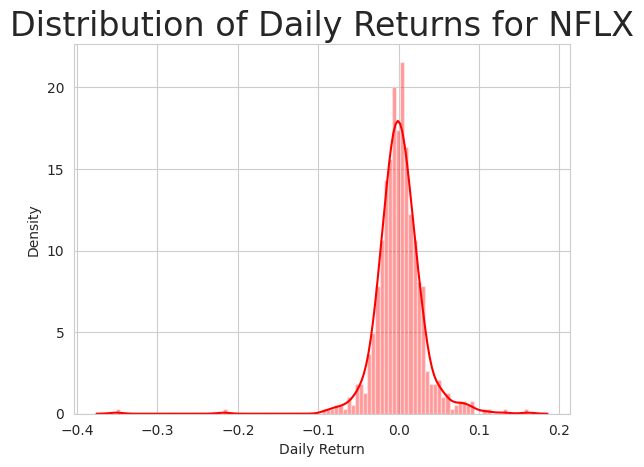

In [27]:
sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='red')
plt.title('Distribution of Daily Returns for NFLX', fontsize=24)

### Distribution of Daily Returns for NFLX

*   The distribution is bell-shaped with a tall, narrow peak and fat tails, indicating a leptokurtic distribution.
*   The peak is centered near zero, showing that small daily changes are most common.
*  The distribution is symmetric, suggesting that positive and negative returns of similar magnitude occur with equal likelihood.
*  Fat tails highlight the frequent occurrence of extreme returns, both positive and negative, compared to a normal distribution.
*   The range of most daily returns is between -10% and 10%, with a few outliers beyond this range, reflecting volatility and risk.




### Correlation Between Different Daily Stock Returns

In [12]:
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2024-10-09 00:00:00+00:00,0.016698,0.013408,-0.015932,0.006631,0.007856
2024-10-10 00:00:00+00:00,-0.002178,0.007993,0.000736,-0.003881,0.003932
2024-10-11 00:00:00+00:00,-0.006505,0.011626,0.008212,0.001154,-0.010270
2024-10-14 00:00:00+00:00,0.016480,-0.006779,0.011123,0.006774,-0.013545
2024-10-15 00:00:00+00:00,0.011025,0.000800,0.003306,-0.000954,-0.009846


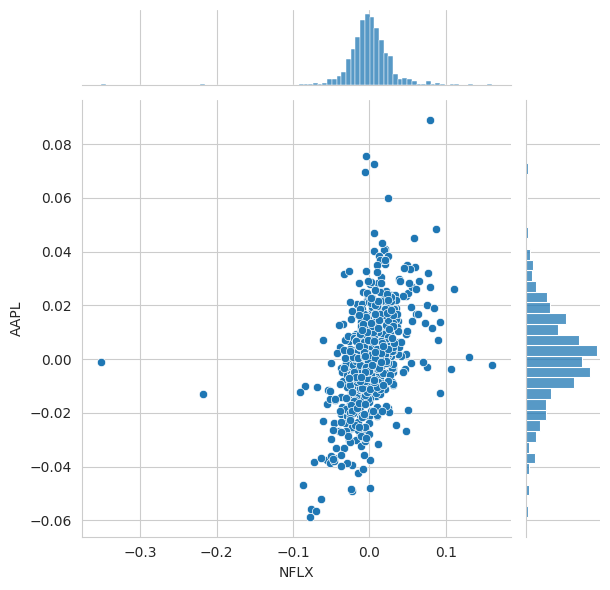

In [13]:
sns.jointplot(x='NFLX', y='AAPL', data=rets_compr, kind='scatter')

### Scatter Plot of NFLX vs AAPL Returns

This scatter plot shows the relationship between daily returns of Netflix and Apple stocks.

* **Positive correlation**: The overall trend shows a positive correlation, meaning Netflix and Apple stocks often move in the same direction.
* **Dispersion**: There's significant scatter, indicating that while there's a relationship, it's not extremely strong.
* **Outliers**: Some points far from the central cluster represent days with extreme movements, likely corresponding to major news events affecting one or both companies.

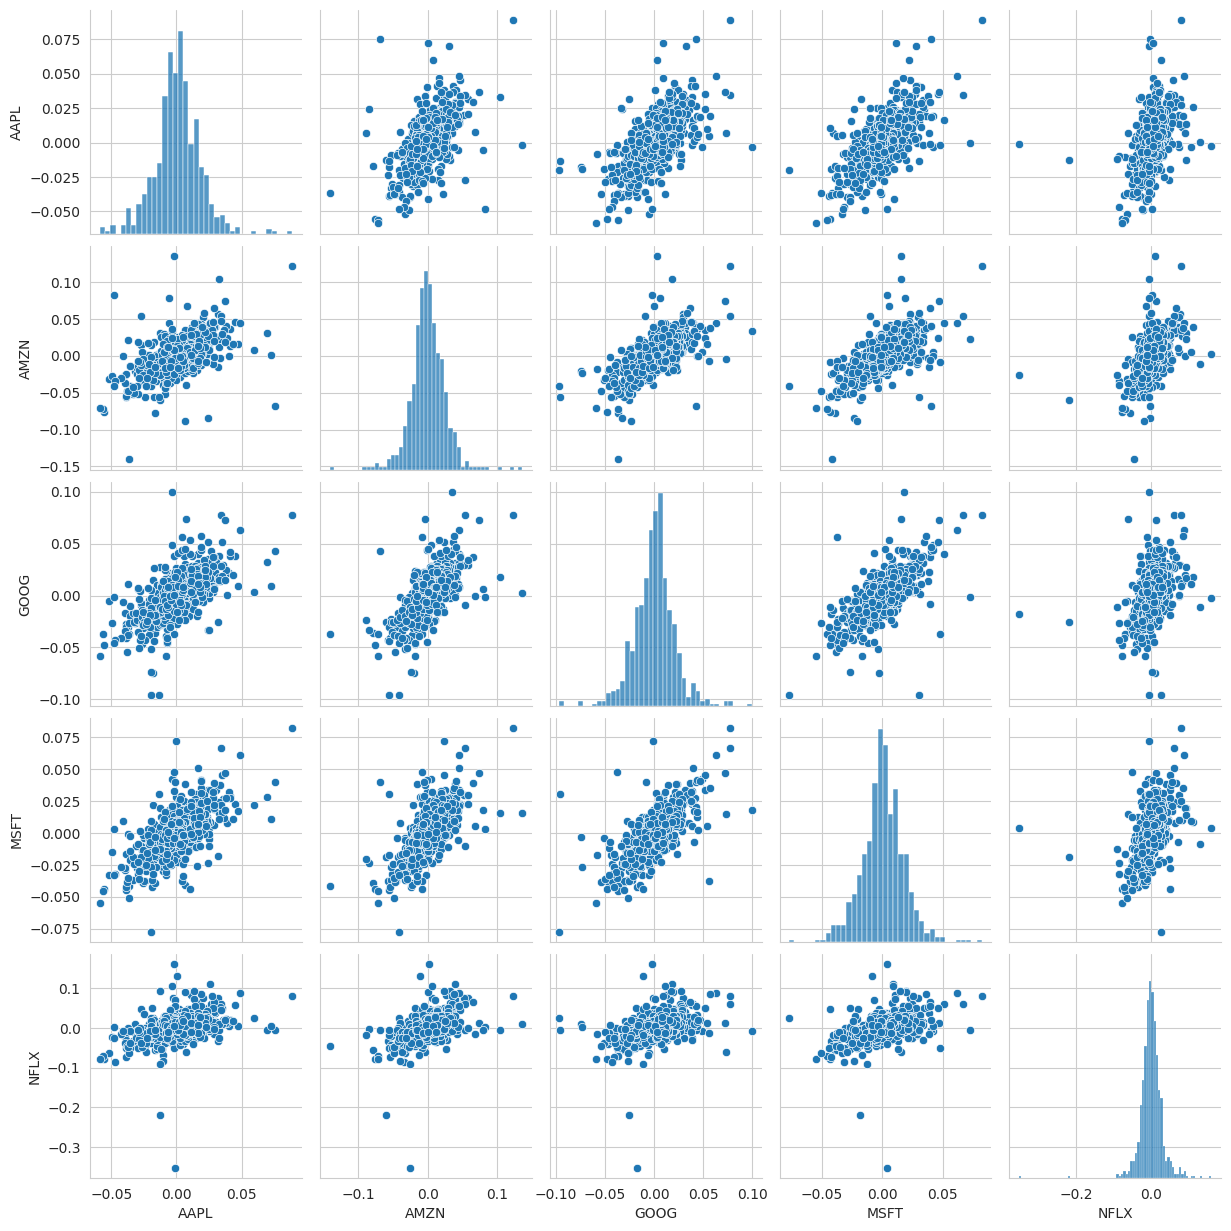

In [14]:
sns.pairplot(rets_compr.dropna())

### Pair Plot of Tech Stock Returns

This pair plot displays relationships between daily returns of five major tech stocks: AAPL, AMZN, GOOG, MSFT, and NFLX.

* **Correlations**: All stock pairs show positive correlations, indicating that these tech stocks generally move in the same direction.
* **Varying strengths**: Some pairs show tighter correlations (less scatter) than others.
* **Return distributions**: The diagonal shows return distributions for each stock. They all appear roughly symmetrical and centered near zero, with some showing slightly fatter tails than others.
* **Outliers**: Visible in most pairings, likely representing significant market events affecting multiple stocks.

Ticker      AAPL      AMZN      GOOG      MSFT      NFLX
Ticker                                                  
AAPL    1.000000  0.568962  0.626387  0.683112  0.437497
AMZN    0.568962  1.000000  0.655684  0.677046  0.505635
GOOG    0.626387  0.655684  1.000000  0.710882  0.428535
MSFT    0.683112  0.677046  0.710882  1.000000  0.455358
NFLX    0.437497  0.505635  0.428535  0.455358  1.000000


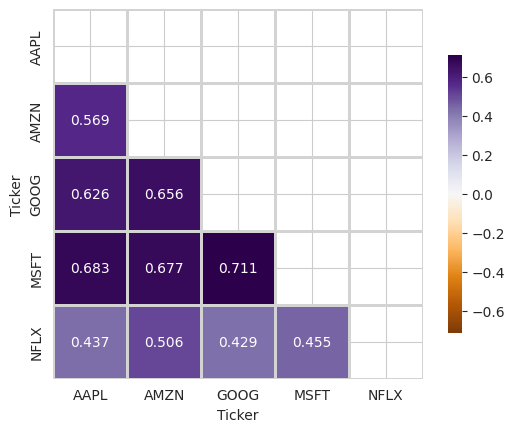

In [15]:
# Calculate the correlation matrix
corr = rets_compr.corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Find the maximum absolute value for the color scale
vmax = np.abs(corr.values[~mask]).max()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax,
            annot=True, fmt=".3f", cbar_kws={"shrink": 0.75})

# Remove axis labels
ax.axis("on")

plt.show()


### Correlation Heatmap

This heatmap quantifies the correlations between the stock returns of the five tech companies.

* **Positive correlations**: All correlations are positive, ranging from about 0.4 to 0.7.
* **Varying strengths**: Some pairs of stocks are more strongly correlated than others. The strongest correlations appear to be between MSFT, GOOG, and AMZN.
* **Asymmetry**: One stock (NFLX) shows consistently lower correlations with the others, suggesting it might be influenced by somewhat different factors.

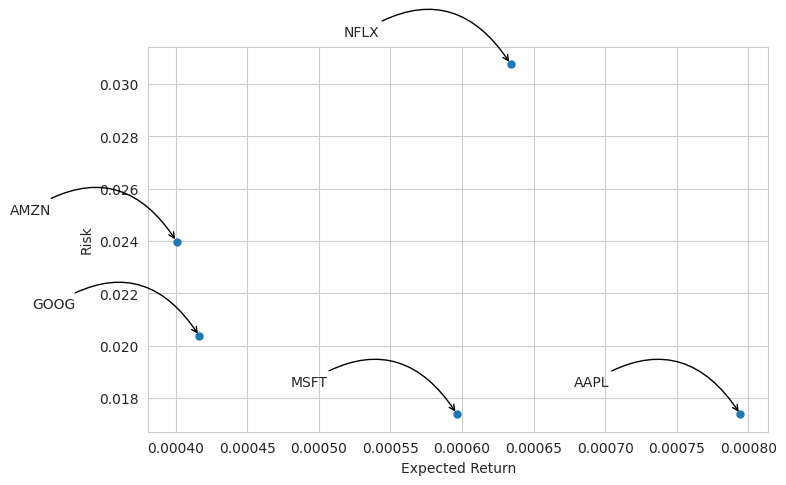

In [16]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5',color='black'))

#### We present a risk-return analysis of five major tech stocks: Netflix, Amazon, Google, Microsoft, and Apple

1. **Netflix (NFLX):**


* Highest risk but also highest expected return
* *Recent news*: Netflix has been performing well due to strong subscriber growth, successful content releases, and the effectiveness of its ad-supported tier. The company reported adding 9.33 million subscribers in Q1 2024, beating expectations.
* The high risk likely reflects the competitive streaming market and content production costs, while the high return potential comes from its market leadership and growth prospects.

2. **Amazon (AMZN):**


* Second-highest risk and return
* *Recent news*: Amazon has seen strong performance in its cloud services (AWS) and e-commerce segments. The company has also been expanding its AI capabilities and healthcare services.
* The risk reflects the competitive nature of cloud computing and e-commerce, while the return potential comes from its diversified business model and market dominance.

3. **Google (GOOG):**


* Moderate risk and return
* *Recent news*: Google has been focusing on AI integration across its products and services. The company faces some regulatory challenges but continues to dominate in search and digital advertising.
* The balanced risk-return profile reflects Google's strong market position and diverse revenue streams

4. **Microsoft (MSFT):**


* Lower risk with moderate return
* *Recent news*: Microsoft has been performing well due to its cloud services (Azure) growth and AI integration. The company's acquisition of Activision Blizzard has strengthened its gaming division.
* The lower risk profile likely comes from its diverse business model and strong enterprise customer base.

5. **Apple (AAPL):**


* Lowest risk but also lowest expected return
* *Recent news*: Apple has been facing challenges in the Chinese market and experiencing a slowdown in iPhone sales. However, the company continues to see growth in services and wearables.
* The low risk likely reflects Apple's strong brand, loyal customer base, and substantial cash reserves, while the lower return expectations may be due to market saturation in its core products.

####General Observations

1. There's a clear risk-return tradeoff among these stocks, with higher risk generally associated with higher expected returns.
2. The tech sector overall has been performing well, driven by AI advancements and cloud computing growth.
3. Companies with more diversified revenue streams (like Microsoft and Apple) tend to have lower risk profiles.
4. Netflix and Amazon, being more focused on specific markets (streaming and e-commerce respectively), show higher risk but also higher return potential.

#### Investment considerations:

1. For risk-averse investors, AAPL and MSFT might be more attractive options.
2. For tho ones seeking higher returns and willing to accept more risk, NFLX and AMZN could be considered.
3. GOOG offers a middle ground, balancing risk and return.